# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [9]:
# Dependencies and Setup
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 627


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"
base_URL = f"{url}appid={weather_api_key}&units={units}&q="
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_URL}{city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather ['coord']['lon']
        city_max_temp = city_weather ['main']['temp_max']
        city_humidity = city_weather ['main']['humidity']
        city_clouds = city_weather ['clouds']['all']
        city_wind = city_weather ['wind']['speed']
        city_country = city_weather ['sys']['country']
        city_date = city_weather ['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | moyale
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | petrovskaya
Processing Record 4 of Set 1 | plastun
Processing Record 5 of Set 1 | invercargill
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | nadym
Processing Record 8 of Set 1 | tazovsky
Processing Record 9 of Set 1 | portland
Processing Record 10 of Set 1 | ulladulla
Processing Record 11 of Set 1 | isafjordur
Processing Record 12 of Set 1 | huilong
Processing Record 13 of Set 1 | blackmans bay
Processing Record 14 of Set 1 | robertsport
Processing Record 15 of Set 1 | avarua
Processing Record 16 of Set 1 | grytviken
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | anadyr
Processing Record 19 of Set 1 | college
Processing Record 20 of Set 1 | gaiman
Processing Record 21 of Set 1 | buzdyak
Processing Record 22 of Set 1 | trincomalee
Processing Record 23 of Set 

Processing Record 41 of Set 4 | fale old settlement
Processing Record 42 of Set 4 | arteche
Processing Record 43 of Set 4 | kudat
Processing Record 44 of Set 4 | fort mcmurray
Processing Record 45 of Set 4 | kimbe
Processing Record 46 of Set 4 | novyy urgal
Processing Record 47 of Set 4 | north saanich
Processing Record 48 of Set 4 | aykhal
Processing Record 49 of Set 4 | st. john's
Processing Record 0 of Set 5 | west island
Processing Record 1 of Set 5 | chicxulub puerto
City not found. Skipping...
Processing Record 2 of Set 5 | san luis de la loma
Processing Record 3 of Set 5 | usinsk
Processing Record 4 of Set 5 | betio village
Processing Record 5 of Set 5 | mtwara
Processing Record 6 of Set 5 | port elizabeth
Processing Record 7 of Set 5 | americus
Processing Record 8 of Set 5 | margaret river
Processing Record 9 of Set 5 | guiuan
Processing Record 10 of Set 5 | la'ie
Processing Record 11 of Set 5 | kiama
Processing Record 12 of Set 5 | surgana
Processing Record 13 of Set 5 | puert

Processing Record 30 of Set 8 | ijuw
City not found. Skipping...
Processing Record 31 of Set 8 | alzamay
Processing Record 32 of Set 8 | kavaratti
Processing Record 33 of Set 8 | syston
Processing Record 34 of Set 8 | inirida
Processing Record 35 of Set 8 | teofilo otoni
Processing Record 36 of Set 8 | daru
Processing Record 37 of Set 8 | jinghong
Processing Record 38 of Set 8 | grambling
Processing Record 39 of Set 8 | dhidhdhoo
Processing Record 40 of Set 8 | quellon
Processing Record 41 of Set 8 | mawu
Processing Record 42 of Set 8 | klaksvik
Processing Record 43 of Set 8 | haiku-pauwela
Processing Record 44 of Set 8 | vryburg
Processing Record 45 of Set 8 | tumpat
Processing Record 46 of Set 8 | lautoka
Processing Record 47 of Set 8 | coahuayana de hidalgo
Processing Record 48 of Set 8 | aksuat
Processing Record 49 of Set 8 | sierra vista
Processing Record 0 of Set 9 | sitka
Processing Record 1 of Set 9 | shizunai-furukawacho
Processing Record 2 of Set 9 | namibe
Processing Record 

Processing Record 19 of Set 12 | mcalester
Processing Record 20 of Set 12 | poso
Processing Record 21 of Set 12 | yuzhno-kurilsk
Processing Record 22 of Set 12 | tanout
Processing Record 23 of Set 12 | labytnangi
Processing Record 24 of Set 12 | patterson
Processing Record 25 of Set 12 | holualoa
Processing Record 26 of Set 12 | lukolela
Processing Record 27 of Set 12 | tucuma
Processing Record 28 of Set 12 | yangor
City not found. Skipping...
Processing Record 29 of Set 12 | malango
Processing Record 30 of Set 12 | aflou
Processing Record 31 of Set 12 | mukalla
Processing Record 32 of Set 12 | khandyga
Processing Record 33 of Set 12 | nova mayachka
Processing Record 34 of Set 12 | ts'khinvali
Processing Record 35 of Set 12 | rurrenabaque
Processing Record 36 of Set 12 | ta'if
Processing Record 37 of Set 12 | fortaleza
Processing Record 38 of Set 12 | mek'ele
Processing Record 39 of Set 12 | hotan
Processing Record 40 of Set 12 | baiyin
Processing Record 41 of Set 12 | merowe
Processin

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
   
# Show Record Count
city_data_df.count()


City          596
Lat           596
Lng           596
Max Temp      596
Humidity      596
Cloudiness    596
Wind Speed    596
Country       596
Date          596
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,moyale,3.5167,39.0584,19.54,72,27,1.38,KE,1686871636
1,port-aux-francais,-49.3500,70.2167,6.70,97,100,11.49,TF,1686871636
2,petrovskaya,45.4314,37.9550,18.34,88,1,3.58,RU,1686871636
3,plastun,44.7561,136.2939,21.00,58,3,0.87,RU,1686871637
4,invercargill,-46.4000,168.3500,6.45,72,100,1.69,NZ,1686871434


In [10]:
# Create the output directory if it doesn't exist
output_dir = "output_data"
os.makedirs(output_dir, exist_ok=True)

# Export the City_Data into a csv
city_data_df.to_csv(os.path.join(output_dir, "cities.csv"), index_label="City_ID")


In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,moyale,3.5167,39.0584,19.54,72,27,1.38,KE,1686871636
1,port-aux-francais,-49.3500,70.2167,6.70,97,100,11.49,TF,1686871636
2,petrovskaya,45.4314,37.9550,18.34,88,1,3.58,RU,1686871636
3,plastun,44.7561,136.2939,21.00,58,3,0.87,RU,1686871637
4,invercargill,-46.4000,168.3500,6.45,72,100,1.69,NZ,1686871434


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

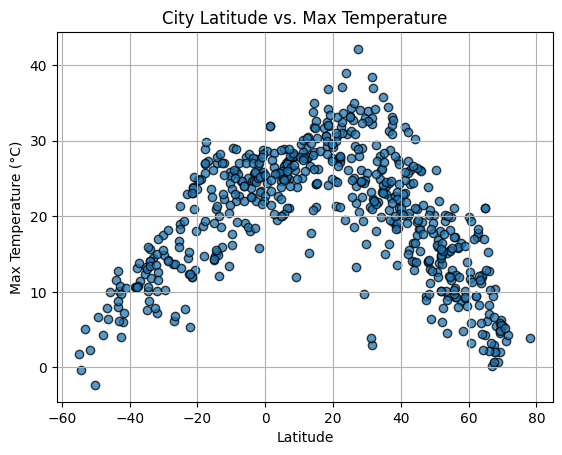

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", alpha=0.75)

# Set the title and labels
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")

# Set the grid lines
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

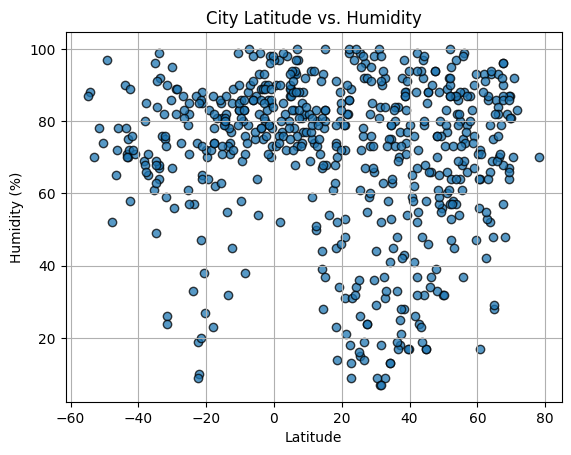

In [13]:
# Build scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", alpha=0.75)

# Set the title and labels
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Set the grid lines
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

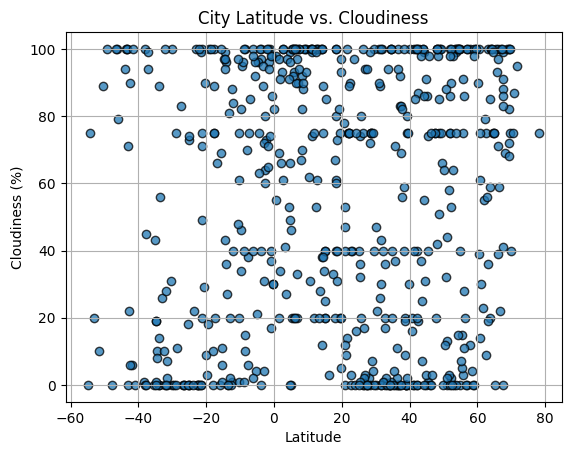

In [14]:
# Build scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", alpha=0.75)

# Set the title and labels
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Set the grid lines
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

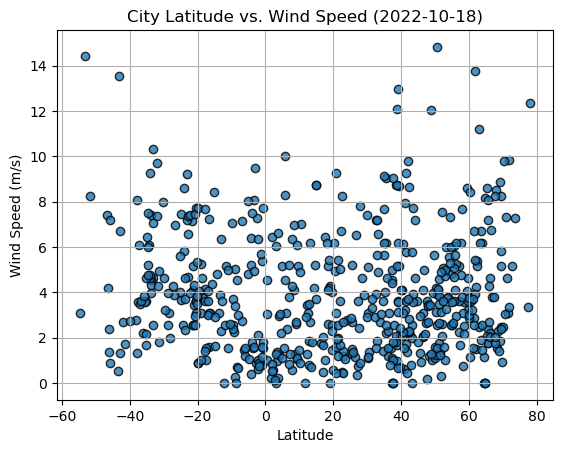

In [11]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x_values, y_values, x_label, y_label, title, output_path):
    # Perform linear regression
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

    # Create regression line
    regression_line = x_values * slope + intercept

    # Create scatter plot
    plt.scatter(x_values, y_values, edgecolor="black", alpha=0.75)

    # Plot the regression line
    plt.plot(x_values, regression_line, color="red")

    # Set the title and labels
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Add the regression equation to the plot
    equation = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.annotate(equation, (min(x_values), max(y_values)), fontsize=12, color="red")

    # Display the correlation coefficient on the plot
    correlation = f"Correlation: {rvalue:.2f}"
    plt.annotate(correlation, (min(x_values), max(y_values) - 5), fontsize=12, color="red")

    # Save the figure
    plt.savefig(output_path)

    # Show the plot
    plt.show()


In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# Filter the city_data_df to get the Northern Hemisphere data
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,moyale,3.5167,39.0584,19.54,72,27,1.38,KE,1686871636
2,petrovskaya,45.4314,37.9550,18.34,88,1,3.58,RU,1686871636
3,plastun,44.7561,136.2939,21.00,58,3,0.87,RU,1686871637
6,nadym,65.5333,72.5167,6.08,86,100,6.63,RU,1686871637
7,tazovsky,67.4667,78.7000,3.02,90,99,5.54,RU,1686871637


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# Filter the city_data_df to get the Southern Hemisphere data
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,6.70,97,100,11.49,TF,1686871636
4,invercargill,-46.4000,168.3500,6.45,72,100,1.69,NZ,1686871434
5,waitangi,-43.9535,-176.5597,11.57,90,94,0.45,NZ,1686871395
9,ulladulla,-35.3500,150.4667,12.40,61,0,1.61,AU,1686871637
12,blackmans bay,-43.0167,147.3167,10.07,75,71,4.02,AU,1686871638


###  Temperature vs. Latitude Linear Regression Plot

In [22]:
# Linear regression on Northern Hemisphere
# Define a function to create linear regression and scatter plot
def plot_linear_regression(x_values, y_values, y_label, text_coordinates, hemisphere_title):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept

    # Create the equation of the line
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    # Create the scatter plot and linear regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")

    # Annotate the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")

    # Set labels and title
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.title(f"{hemisphere_title} Linear Regression: Latitude vs. {y_label}")

    # Print the r-squared value
    print(f"The r-squared is: {rvalue**2}")

    # Show the plot
    plt.show()


The r-squared is: 0.53350595308847


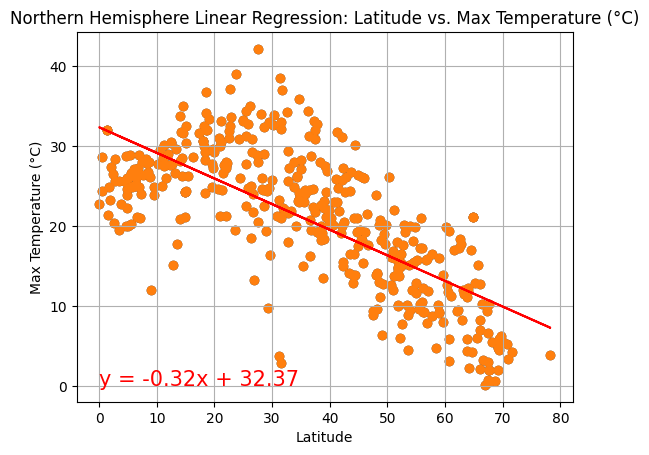

In [25]:
# Build the scatter plots for temperature vs. latitude in both hemispheres
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], marker="o", edgecolor="black", alpha=0.8)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.title("City Latitude vs. Max Temperature (Northern Hemisphere)")
plt.grid(True)

# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Max Temperature (°C)", (0, 0), "Northern Hemisphere")


# Show plot
plt.show()


The r-squared is: 0.6831926286060626


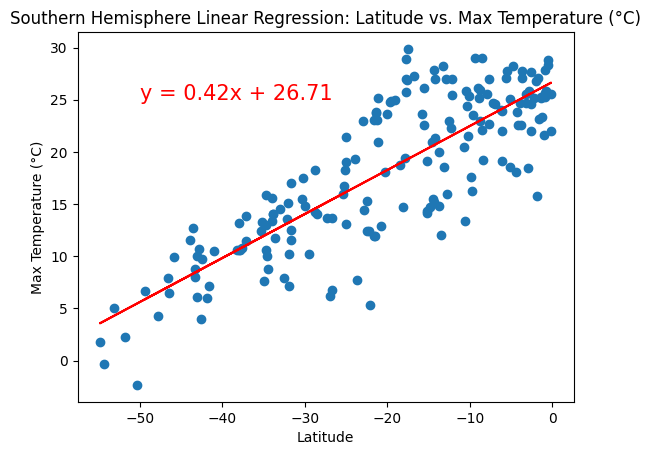

In [23]:
# Linear regression on Southern Hemisphere
# Call the function to create the linear regression plot for temperature vs. latitude
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Max Temperature (°C)", (-50, 25), "Southern Hemisphere")


**Discussion about the linear relationship:**  As we move closer to the middle of the Earth (near the equator), it tends to get hotter. This is true for both the Northern Hemisphere (north of the equator) and the Southern Hemisphere (south of the equator). In the Northern Hemisphere, the temperature generally decreases as we go further north, while in the Southern Hemisphere, the temperature generally decreases as we go further south.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.002556257053017565


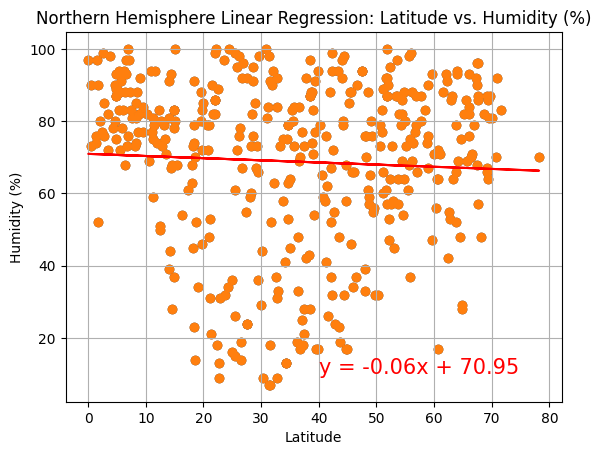

In [26]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], marker="o", edgecolor="black", alpha=0.8)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (Northern Hemisphere)")
plt.grid(True)

# Perform linear regression
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Humidity (%)", (40,10), "Northern Hemisphere")

# Show plot
plt.show()

The r-squared is: 0.034533962186866496


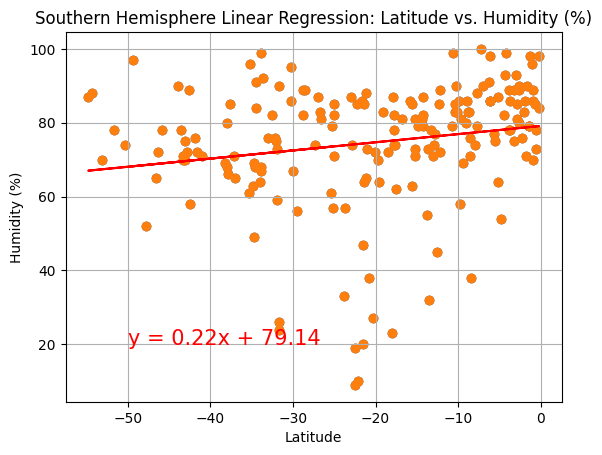

In [27]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], marker="o", edgecolor="black", alpha=0.8)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (Southern Hemisphere)")
plt.grid(True)

# Perform linear regression
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Humidity (%)", (-50,20), "Southern Hemisphere")

# Show plot
plt.show()

**Discussion about the linear relationship:** The relationship between latitude and humidity is not straightforward and can vary a lot. Factors like proximity to water, wind patterns, and local climate can affect humidity levels, and these factors can differ from place to place. This means that just knowing the latitude of a location is not enough to predict its humidity accurately. Other local factors and regional climate conditions have a bigger influence on humidity levels. To fully understand the connection between latitude and humidity, we need to consider all these factors that affect humidity in different regions.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.00014756876130513988


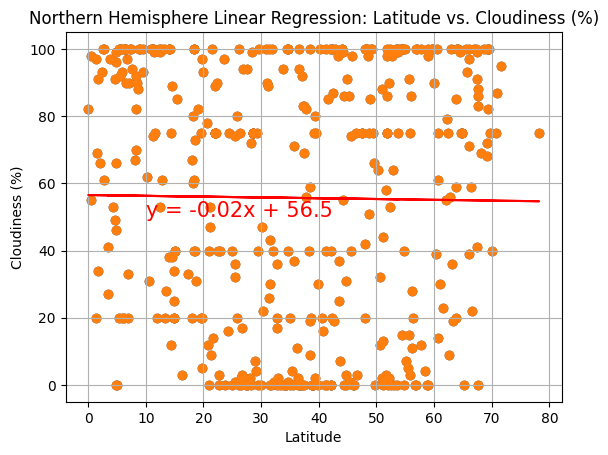

In [28]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], marker="o", edgecolor="black", alpha=0.8)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (Northern Hemisphere)")
plt.grid(True)

# Perform linear regression
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Cloudiness (%)", (10,50), "Northern Hemisphere")

# Show plot
plt.show()

The r-squared is: 0.03818007662341699


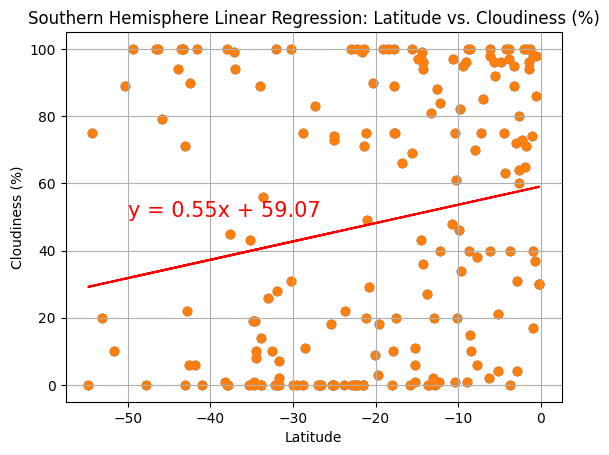

In [29]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], marker="o", edgecolor="black", alpha=0.8)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (Southern Hemisphere)")
plt.grid(True)

# Perform linear regression
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Cloudiness (%)", (-50,50), "Southern Hemisphere")

# Show plot
plt.show()

**Discussion about the linear relationship:**  The relationship between latitude and cloudiness doesn't show a clear pattern. Cloudiness can vary a lot at different latitudes, and it's not solely determined by latitude alone. Factors like moisture in the air, temperature, and local weather patterns also influence cloudiness. So, while there might be some general patterns or regional effects, we can't say that cloudiness increases or decreases uniformly with latitude. To understand cloudiness better, we need to consider other factors and local variations that affect cloud formation and coverage at different latitudes.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.00271234687097229


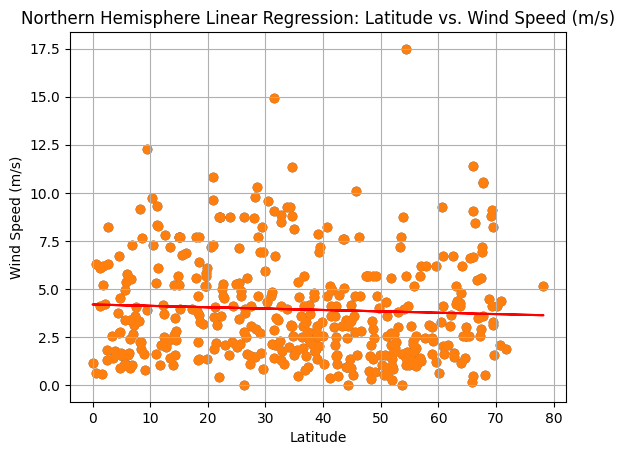

In [30]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], marker="o", edgecolor="black", alpha=0.8)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (Northern Hemisphere)")
plt.grid(True)

# Perform linear regression
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Wind Speed (m/s)", (10, 20), "Northern Hemisphere")

# Show plot
plt.show()

The r-squared is: 0.027592773523900018


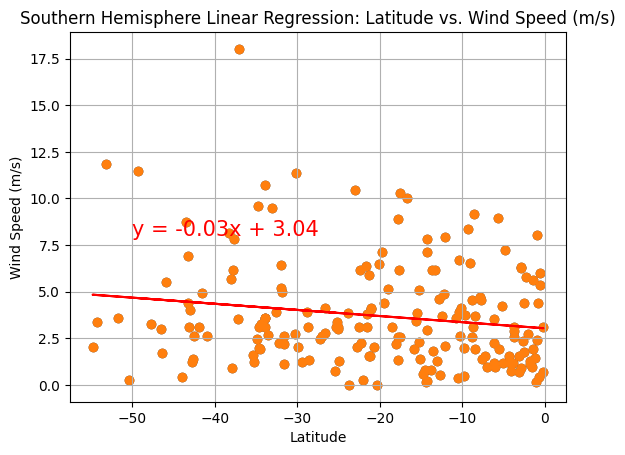

In [31]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], marker="o", edgecolor="black", alpha=0.8)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (Southern Hemisphere)")
plt.grid(True)

# Perform linear regression
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Wind Speed (m/s)", (-50, 8), "Southern Hemisphere")

# Show plot
plt.show()

**Discussion about the linear relationship:** When it comes to wind speed and latitude, we see a small increase in wind speed as we move away from the equator in both the Northern and Southern Hemisphere. So, generally, wind speed tends to be slightly higher at higher latitudes. However, it's important to remember that other factors like local geography, weather patterns, and atmospheric conditions also influence wind speed. Latitude alone doesn't tell the whole story. It's just one factor among many that affect wind patterns. So, while latitude gives us some idea about wind speed, there are other things to consider to fully understand how wind behaves.